# Importing toolkits

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
pd.set_option('future.no_silent_downcasting', True)
pd.options.mode.copy_on_write = "warn"

### Reading Dataframe

In [3]:
df = pd.read_csv('Salary_Data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6702.0,33.620859,7.614633,21.0,28.0,32.0,38.0,62.0
Years of Experience,6701.0,8.094687,6.059003,0.0,3.0,7.0,12.0,34.0
Salary,6699.0,115326.964771,52786.183911,350.0,70000.0,115000.0,160000.0,250000.0


### Data Cleaning

In [7]:
df['Education Level'] = df['Education Level'].replace("Bachelor's Degree", "Bachelor's")
df['Education Level'] = df['Education Level'].replace("Master's Degree", "Master's")
df['Education Level'] = df['Education Level'].replace("phD", "PhD")

### Data Preprocessing

In [8]:
# Check For Duplicates
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [9]:
# Get Quick Look at Nan Values
df[df["Age"].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Drop Records That Contain Only Nan Values 
df.dropna(inplace=True)

# Check Again For Nan Values
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [11]:
df.duplicated().sum()

4912

In [12]:
df[df.duplicated()].head(15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [13]:
# Drop Duplicates Records
df.drop_duplicates(inplace=True)

# Reset Our Index to be Orderd
df.reset_index(inplace=True, drop=True)

## Data Visualization

#### Age Column

In [14]:
mean_of_age = df["Age"].mean()
median_of_age = df["Age"].median()

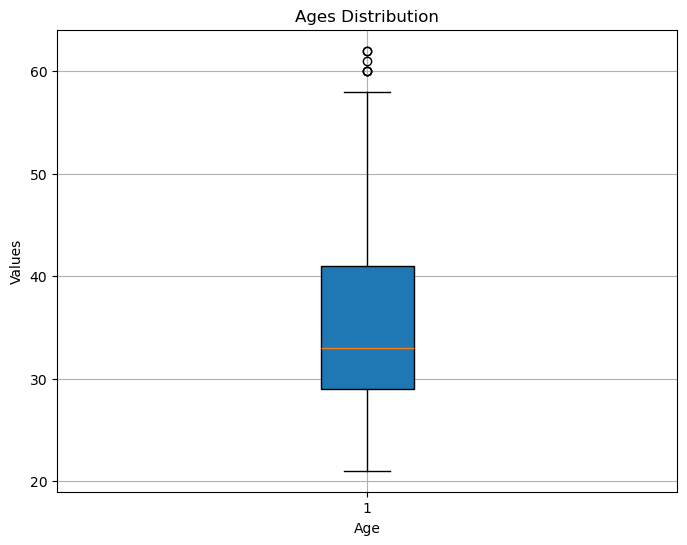

In [15]:
data = df["Age"]  # Extract the Age column

# Create the boxplot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.boxplot(data, patch_artist=True, vert=True)  # vert=True for vertical boxplot

# Customize the plot
plt.xlabel("Age")
plt.ylabel("Values")
plt.title("Ages Distribution")
plt.grid(True)  # Add grid for better readability (optional)

# Show the plot
plt.show()

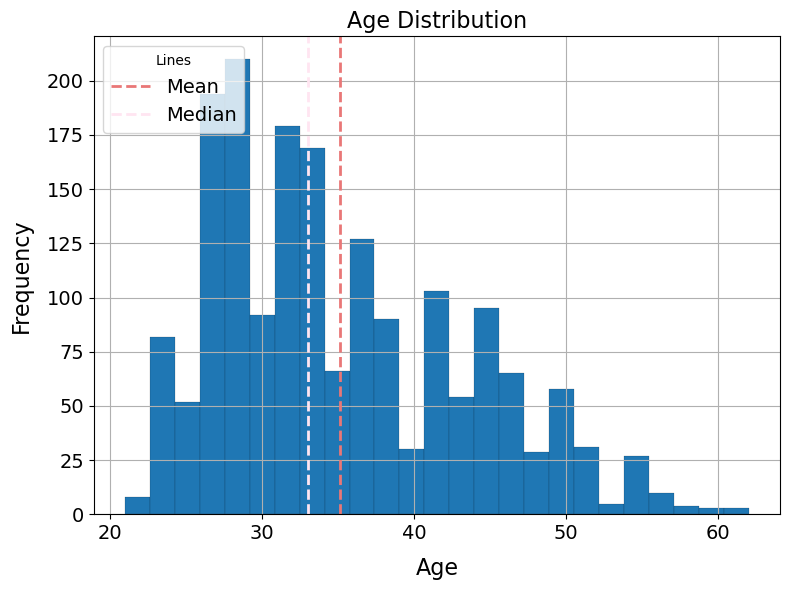

In [16]:
import matplotlib.pyplot as plt


data = df["Age"]  # Extract the Age column


nbins = 25


plt.figure(figsize=(8, 6))
plt.hist(data, bins=nbins, edgecolor="black", linewidth=0.1)  # Set bin edges and line width


plt.xlabel("Age", labelpad=10)
plt.ylabel("Frequency", labelpad=10)  
plt.title("Age Distribution", fontsize=16) 


plt.tick_params(axis="both", which="major", labelsize=14)
plt.gca().xaxis.label.set_size(16) 
plt.gca().yaxis.label.set_size(16)


plt.axvline(x=mean_of_age, color="#E97777", linestyle="dashed", linewidth=2, label="Mean")
plt.axvline(x=median_of_age, color="#FFE5F1", linestyle="dashed", linewidth=2, label="Median")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Lines", loc="upper left", prop={"size": 14})

plt.grid(True)  
plt.tight_layout()  
plt.show()


#### Gender Column

In [17]:
gender = df["Gender"].value_counts(normalize=1) * 100
gender.apply(lambda x: f"{x:0.2f}%")

Gender
Male      54.09%
Female    45.52%
Other      0.39%
Name: proportion, dtype: object

#### Education Column

In [18]:
education = df["Education Level"].value_counts(normalize=1) * 100
education.apply(lambda x: f"{x:0.2f}%")

Education Level
Bachelor's     42.95%
Master's       31.80%
PhD            19.09%
High School     6.16%
Name: proportion, dtype: object

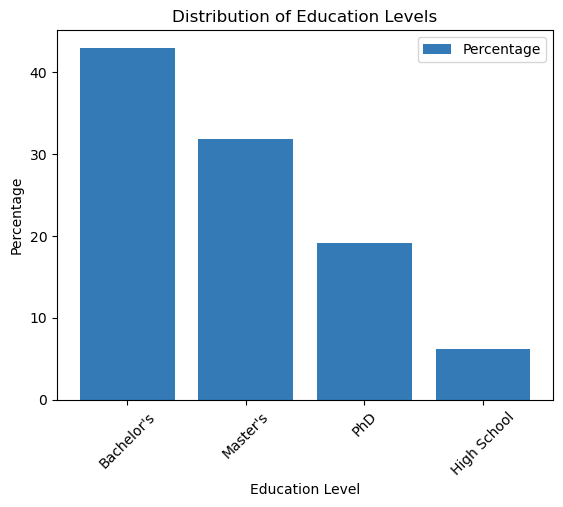

In [19]:
labels = education.index
percentages = education.values

plt.bar(labels, percentages, color='#337ab7')  # blue color
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees
plt.legend(['Percentage'])  # add a legend
plt.show()

#### Experience Column

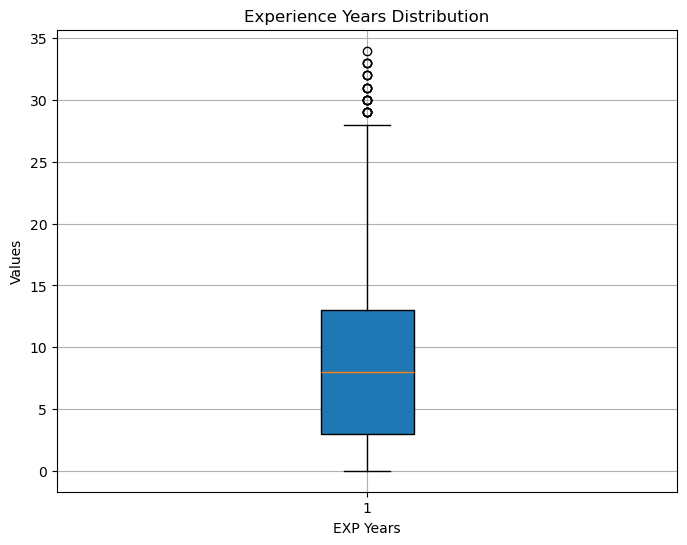

In [20]:
data = df["Years of Experience"] 


plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.boxplot(data, patch_artist=True, vert=True)


plt.xlabel("EXP Years")
plt.ylabel("Values")
plt.title("Experience Years Distribution")
plt.grid(True)

plt.show()

#### Salary Column

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


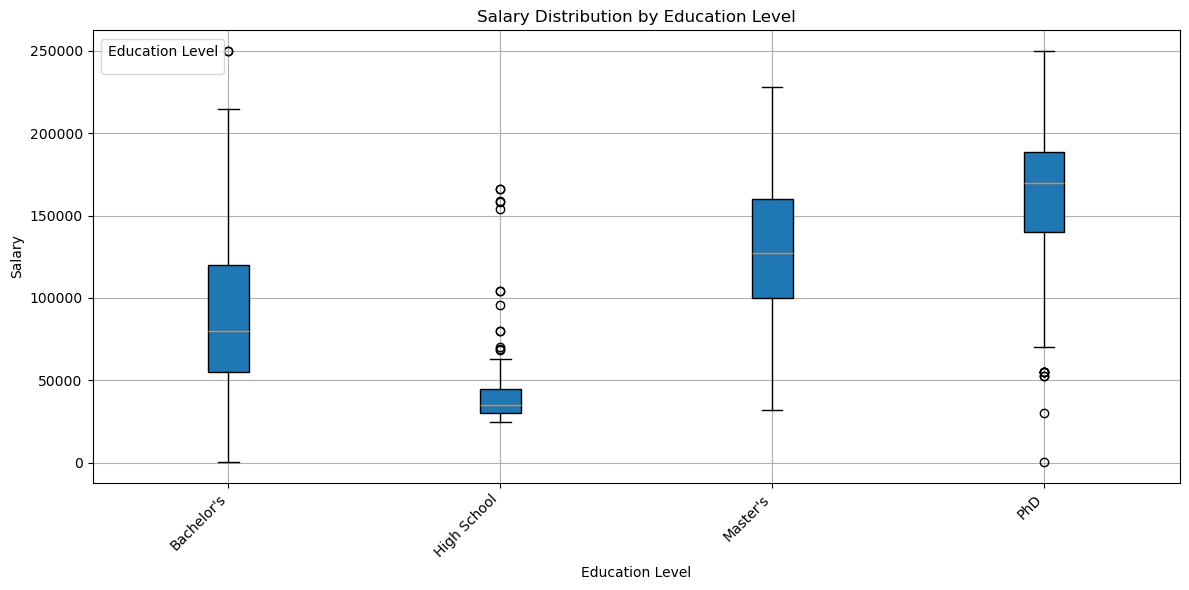

In [21]:
data_dict = df.groupby("Education Level")["Salary"].apply(list)  # Dictionary of salary lists per education level


plt.figure(figsize=(12, 6))  


positions = range(1, len(data_dict) + 1)  


for i, (education_level, salary_list) in enumerate(data_dict.items()):
    plt.boxplot(salary_list, positions=[positions[i]], patch_artist=True, vert=True)


plt.xlabel("Education Level")
plt.ylabel("Salary")
plt.title("Salary Distribution by Education Level")
plt.xticks(positions, data_dict.index, rotation=45, ha="right")  
plt.grid(True)  


plt.legend(title="Education Level", loc="upper left", prop={"size": 12})


plt.tight_layout()  
plt.show()

In [22]:
salary_by_gender = df.groupby("Gender")["Salary"].mean().sort_values(ascending=False)
salary_by_gender.apply(lambda x: f"${x:,.2f}")

Gender
Other     $125,819.00
Male      $118,056.20
Female    $107,365.27
Name: Salary, dtype: object

In [23]:
salary_by_education = df.groupby("Education Level")["Salary"].mean().sort_values(ascending=False)
salary_by_education.apply(lambda x: f"${x:,.2f}")

Education Level
PhD            $160,942.52
Master's       $127,432.81
Bachelor's      $91,199.21
High School     $45,435.98
Name: Salary, dtype: object

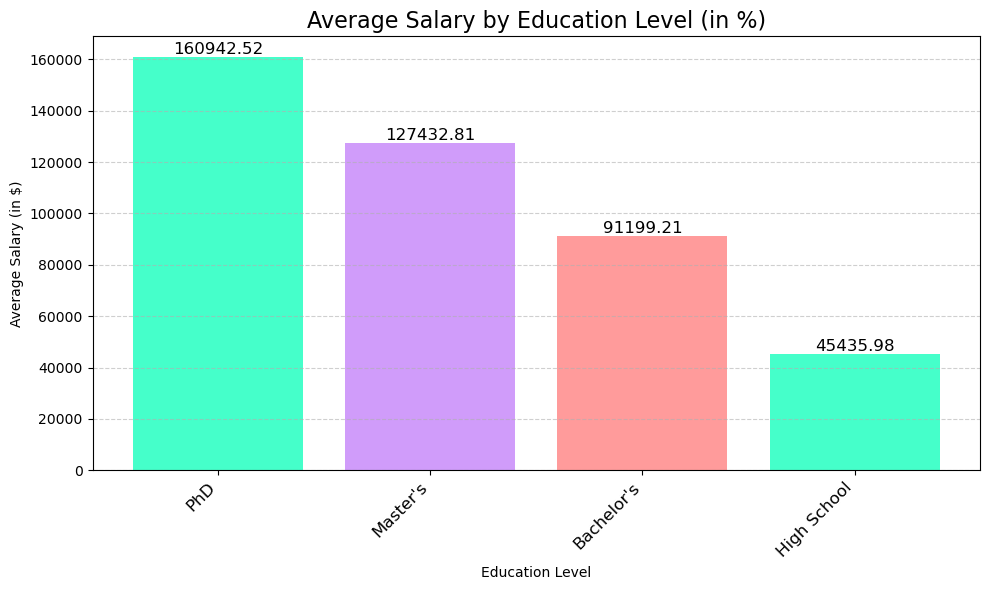

In [24]:
education_levels = salary_by_education.index.to_numpy()  # Assuming index represents education levels
average_salaries = salary_by_education.to_numpy()

plt.figure(figsize=(10, 6))  
bars = plt.bar(education_levels, average_salaries, color=["#45FFCA", "#D09CFA", "#FF9B9B"])
plt.xlabel("Education Level")
plt.ylabel("Average Salary (in $)")
plt.title("Average Salary by Education Level (in %)", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
for bar, value in zip(bars, average_salaries):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f"{value:.2f}", ha="center", va="bottom", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
def custome_layout():
    pass
plt.show()


In [25]:
# To Convert Years of Experience into 5 Catefoty
def groupping_exp(exp):
    if exp >= 0 and exp <= 5:
        return "0-5 years"
    elif exp > 5 and exp <= 10:
        return "6-10 years"
    elif exp > 10 and exp <= 15:
        return "11-15 years"
    elif exp > 15 and exp <= 20:
        return "16-20 years"
    else:
        return "20+"       

In [26]:
salary_by_exp = df.groupby(df["Years of Experience"].apply(groupping_exp))["Salary"].mean().sort_values(ascending=False)
salary_by_exp.apply(lambda x: f"${x:,.2f}")

Years of Experience
20+            $181,685.95
16-20 years    $172,616.11
11-15 years    $147,325.87
6-10 years     $115,908.35
0-5 years       $64,305.61
Name: Salary, dtype: object

#### Correlation HeatMap & Charts 

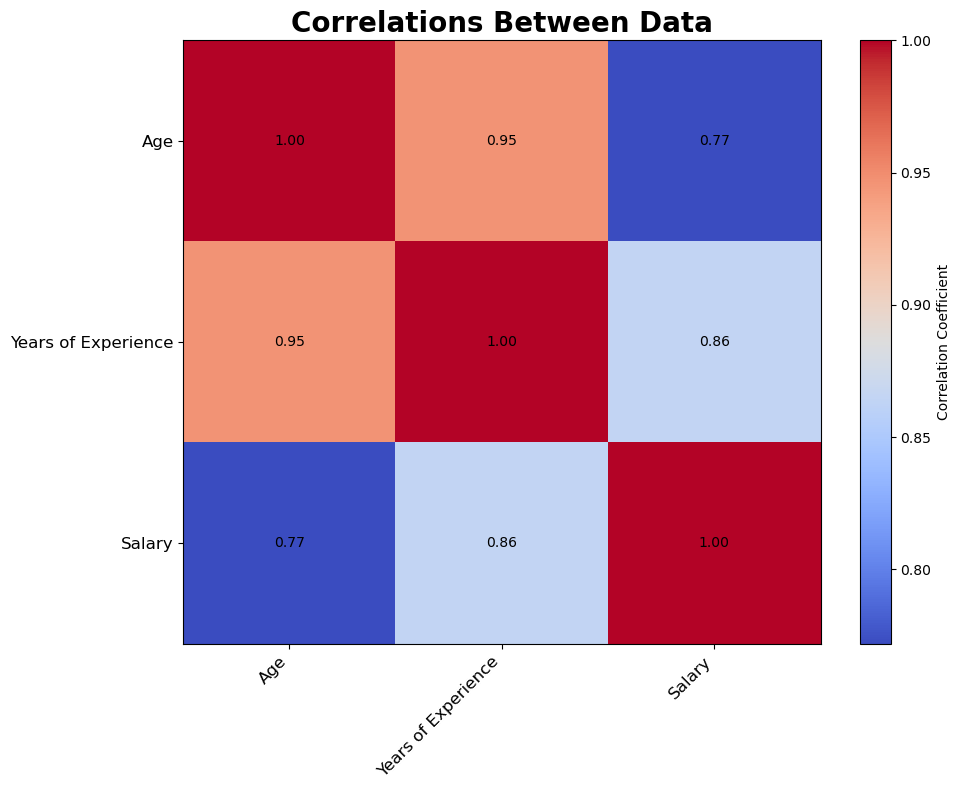

In [27]:
numeric_df = df.select_dtypes(include=[np.number])  # Select numeric columns only
correlation = numeric_df.corr(method='spearman')


plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap="coolwarm", aspect="auto")


plt.colorbar(label="Correlation Coefficient")
plt.title("Correlations Between Data", fontsize=20, fontweight="bold")  


plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45, ha="right", fontsize=12)
plt.yticks(range(len(correlation.columns)), correlation.columns, fontsize=12)


for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        plt.text(j, i, f"{correlation.iloc[i, j]:.2f}", ha="center", va="center", fontsize=10, color="black")  


plt.grid(False)  
plt.tight_layout()  
plt.show()

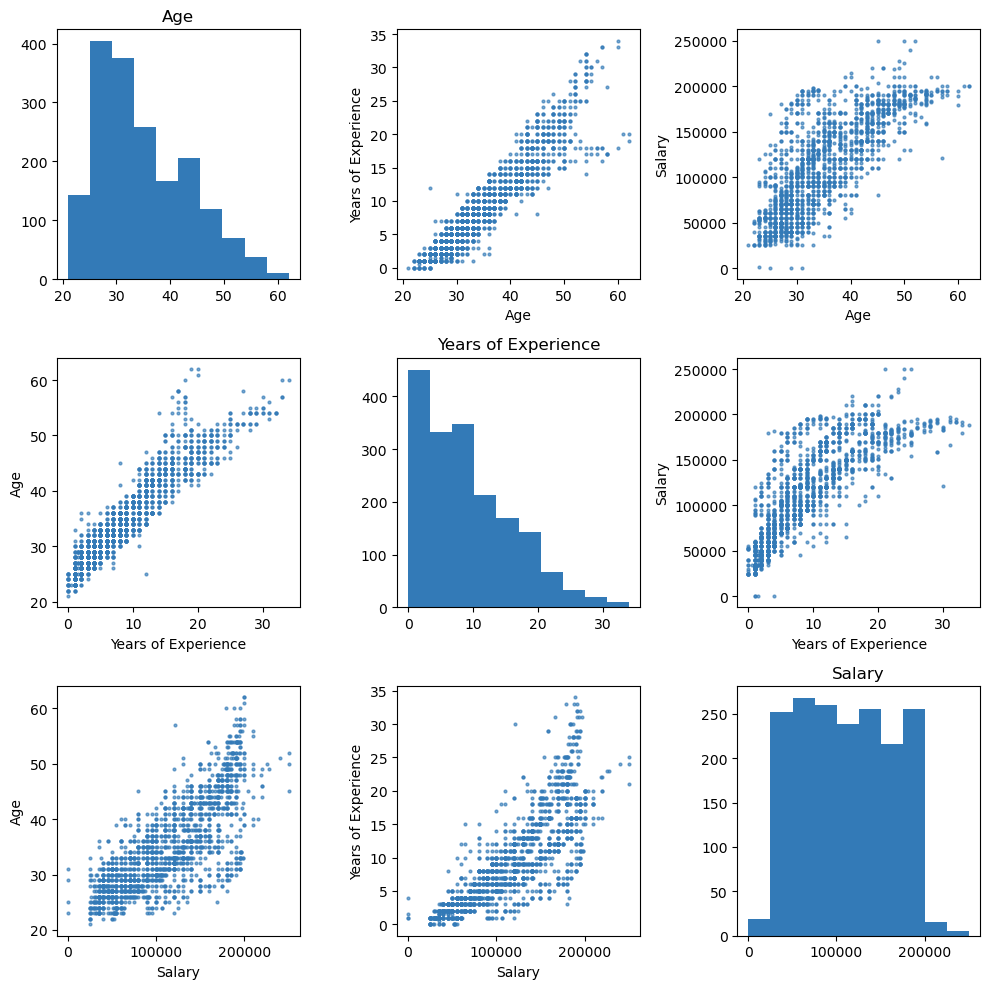

In [28]:
numeric_columns = df.select_dtypes(include="number").columns

fig, axs = plt.subplots(nrows=len(numeric_columns), ncols=len(numeric_columns), figsize=(10, 10))

for i, column in enumerate(numeric_columns):
    for j, other_column in enumerate(numeric_columns):
        if i == j:
            axs[i, j].hist(df[column], bins=10, color='#337ab7')
            axs[i, j].set_title(column)
        else:
            axs[i, j].scatter(df[column], df[other_column], color='#337ab7', alpha=0.65, s=4)
            axs[i, j].set_xlabel(column)
            axs[i, j].set_ylabel(other_column)

plt.tight_layout()
plt.show()

## Prediction Model

In [29]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

In [30]:
df_encoded = pd.get_dummies(df, columns=["Education Level"]) 
df_encoded.head()

,Age,Gender,Job Title,Years of Experience,Salary,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD
0,32.0,Male,Software Engineer,5.0,90000.0,True,False,False,False
1,28.0,Female,Data Analyst,3.0,65000.0,False,False,True,False
2,45.0,Male,Senior Manager,15.0,150000.0,False,False,False,True
3,36.0,Female,Sales Associate,7.0,60000.0,True,False,False,False
4,52.0,Male,Director,20.0,200000.0,False,False,True,False


In [31]:
X = df_encoded.drop(columns=["Job Title", "Salary", "Gender"])
y = df_encoded["Salary"]

In [32]:
X.head()

,Age,Years of Experience,Education Level_Bachelor's,Education Level_High School,Education Level_Master's,Education Level_PhD
0,32.0,5.0,True,False,False,False
1,28.0,3.0,False,False,True,False
2,45.0,15.0,False,False,False,True
3,36.0,7.0,True,False,False,False
4,52.0,20.0,False,False,True,False


In [33]:
X.columns

Index(['Age', 'Years of Experience', 'Education Level_Bachelor's',
       'Education Level_High School', 'Education Level_Master's',
       'Education Level_PhD'],
      dtype='object')

#### Splitting our data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

#### Cross Validation Score

In [35]:
kf = KFold(n_splits=10, shuffle=True, random_state=30)

In [36]:
rf = RandomForestRegressor(n_estimators=500, random_state=11)

In [37]:
scores = cross_val_score(rf, X, y, cv=kf)
print(f"Cross Validation Score: {np.mean(scores)*100:0.2f}%")

Cross Validation Score: 79.41%


#### Fitting the model

In [38]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=11)

In [39]:
score = rf.score(X_train, y_train)*100
print(f"Model Score: {np.round(score, 2)}%")

Model Score: 88.21%


In [40]:
predicted_salary = np.round(rf.predict(X_test))

In [41]:
d = {
    "Actual_Salary" : y_test,
    "Predicted_Salary" : predicted_salary,
    "error": predicted_salary - y_test
}
predicted_df = pd.DataFrame(d)
predicted_df.head()

,Actual_Salary,Predicted_Salary,error
927,220000.0,189641.0,-30359.0
336,115000.0,63897.0,-51103.0
1440,55000.0,94835.0,39835.0
1695,140000.0,140876.0,876.0
1086,100358.0,113387.0,13029.0


In [42]:
score = r2_score(y_test, predicted_salary)*100
print(f"Model Score: {np.round(score, 2)}%")

Model Score: 82.27%


In [43]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_salary))
print(f"Error Ratio: {rmse:.3f}")

Error Ratio: 21883.458


### Prediction with Linear Regression

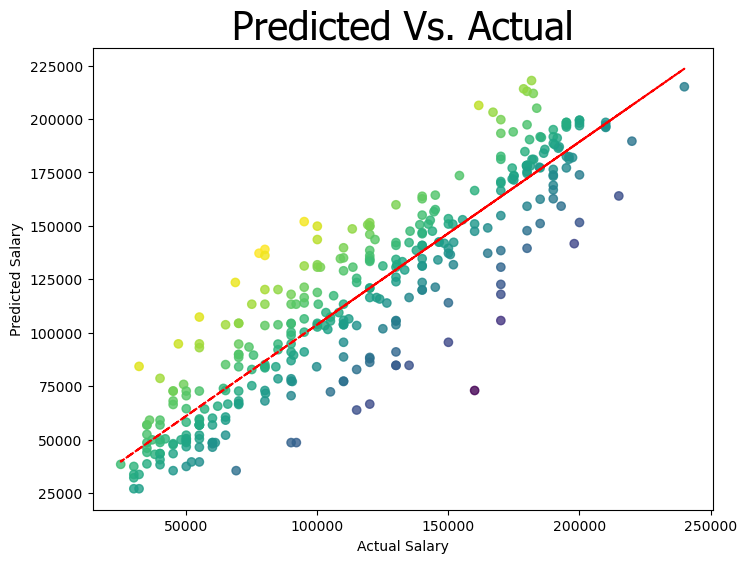

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(predicted_df["Actual_Salary"], predicted_df["Predicted_Salary"], c=predicted_df["error"], alpha=0.8)

ax.set_title("Predicted Vs. Actual", fontsize=28, fontname="Tahoma")
ax.set_xlabel("Actual Salary")
ax.set_ylabel("Predicted Salary")

# Add trendline
z = np.polyfit(predicted_df["Actual_Salary"], predicted_df["Predicted_Salary"], 1)
p = np.poly1d(z)
ax.plot(predicted_df["Actual_Salary"],p(predicted_df["Actual_Salary"]),"r--")

plt.show()

## Model Deployment

In [45]:
pickle.dump(rf,open("model.pkl","wb"))